<a href="https://colab.research.google.com/github/siddhantjain07/Tensorflow-Practice/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Low level implemetation of Linear Regression using TF v2

Author : Siddhant Jain

Project : https://github.com/siddhantjain07/Tensorflow-Practice

In [0]:
from __future__ import absolute_import, print_function, division
import tensorflow as tf
import numpy as np

In [0]:
random = np.random

In [0]:
#Parameters 
learning_rate = 0.001
iterations = 10000
display_steps = 50

In [0]:
'''
#Creating training data for our regression model
x_train = np.arange(100)*random.randn(100)
y_train = random.random(100)*2

#Converting data into numpy array then to row vector
x_train = np.asarray([x_train]).reshape((100,1))
y_train = np.asarray([y_train]).reshape((100,1))

'''

In [0]:
# Training Data.
x_train = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
y_train = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [184]:
y_train.shape

(17,)

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

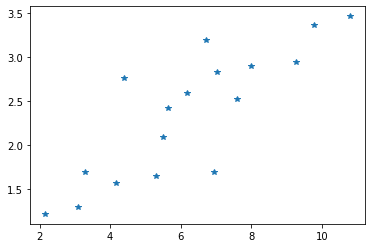

In [186]:
#Visualizing our data
plt.plot(x_train,y_train,"*")
plt.show()

In [0]:
#Weights and biases, random initialization
weight = tf.Variable(random.randn(),name="weight")
bias = tf.Variable(random.randn() ,name="bias")

In [0]:
#Linear Regression
def Linear_Regression(X):
  Yhat = tf.add(tf.multiply(weight,X),bias)
  return Yhat

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [0]:
#Stocastic Gradient Descent
optimizer = tf.optimizers.SGD(learning_rate)

In [0]:
def run_optimization():
  #Wrap the computation with tf.GradientTape() for calculation of derivative
  with tf.GradientTape() as g:
    Yhat = Linear_Regression(x_train)
    error = mean_square(Yhat, y_train)
  #Compute gradients
  
  gradients = g.gradient(error, [weight, bias])
  
  """"
  Update weight and bias
  Formula background
  w[t] = w[t] - learning_rate*dw[t]
  b[t] = b[t] - learning_rate*db[t]
  Here [t] is iteration t
  """""  
  optimizer.apply_gradients(zip(gradients,[weight,bias]))

In [191]:
#Run optimization
for iter in range(1,iterations+1):
  #Run optimization and update weight and bias
  run_optimization()

  if iter%display_steps ==0:
    pred = Linear_Regression(x_train)
    loss = mean_square(pred,y_train)
    print("Iteration:{} Loss:{} weight:{} bias:{}".format(iter,loss,weight.numpy(),bias.numpy()))

Iteration:50 Loss:0.15892809629440308 weight:0.2807151675224304 bias:0.5968103408813477
Iteration:100 Loss:0.15879148244857788 weight:0.2797989249229431 bias:0.5991677641868591
Iteration:150 Loss:0.15867315232753754 weight:0.27945414185523987 bias:0.6015759706497192
Iteration:200 Loss:0.15855766832828522 weight:0.27911847829818726 bias:0.6039558053016663
Iteration:250 Loss:0.1584448665380478 weight:0.278786838054657 bias:0.6063068509101868
Iteration:300 Loss:0.1583348512649536 weight:0.2784591615200043 bias:0.6086295247077942
Iteration:350 Loss:0.15822748839855194 weight:0.2781355679035187 bias:0.6109241843223572
Iteration:400 Loss:0.15812267363071442 weight:0.2778157889842987 bias:0.6131911277770996
Iteration:450 Loss:0.15802036225795746 weight:0.27749988436698914 bias:0.6154306530952454
Iteration:500 Loss:0.1579204946756363 weight:0.2771878242492676 bias:0.6176432371139526
Iteration:550 Loss:0.15782305598258972 weight:0.2768794596195221 bias:0.6198291182518005
Iteration:600 Loss:0.15

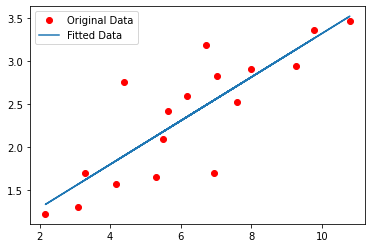

In [192]:
#PLoting our learnt weights and bias
plt.plot(x_train,y_train,"ro",label="Original Data")
plt.plot(x_train,np.array(x_train*weight+bias),"-",label="Fitted Data")
plt.legend()
plt.show()